In [37]:
!pip install --upgrade gensim -q

In [38]:
!pip install nltk

In [39]:
# imports the essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from textblob import TextBlob
from sklearn.manifold import TSNE
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import spacy
import string
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

In [40]:
gensim.__version__

'4.3.2'

In [41]:
import gensim.downloader as api


In [42]:
import re
import random
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from nltk.util import ngrams
from collections import Counter
from collections import Counter, defaultdict


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [43]:
from google.colab import drive
# Mount your Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
# Read the dataset from the specified path
df = pd.read_csv('/content/drive/MyDrive/ML Project Dataset/fake_real.csv', sep=',', encoding='utf-8', quotechar='"')


# **Exploratory Data Analysis**

In [45]:
# Display the first few rows of the DataFrame
df.head()

Unnamed: 0                                            Content  \
0           0  new york reuters us environmental group sierra...   
1           1  washington reuters us air force asked industry...   
2           2  saturday paul ryan posted photo instagram phot...   
3           3  america keeps waiting word hillary indicted ob...   
4           4                   religion peace ht weasel zippers   

          Title  Type  
0  politicsNews  true  
1  politicsNews  true  
2          News  fake  
3      politics  fake  
4     left-news  fake

In [46]:
# Display the last few rows of the DataFrame
df.tail()

Unnamed: 0                                            Content  \
44893       44893  new york reuters myanmar national security adv...   
44894       44894  reckless hillary cared less seriousness exposi...   
44895       44895  montevideo reuters lucia topolansky uruguay se...   
44896       44896  donald trump getting heavy media coverage late...   
44897       44897  jakarta reuters indonesian security forces eas...   

           Title  Type  
44893  worldnews  true  
44894   politics  fake  
44895  worldnews  true  
44896       News  fake  
44897  worldnews  true

In [47]:
#check the distribution of Types
df['Type'].value_counts()

Type
fake    23481
true    21417
Name: count, dtype: int64

In [48]:
#Add the new column which gives a unique number to each of these labels

df['Type_num'] = df['Type'].map({'fake' : 0, 'true': 1})

#check the results with top 5 rows
df.head(5)

Unnamed: 0                                            Content  \
0           0  new york reuters us environmental group sierra...   
1           1  washington reuters us air force asked industry...   
2           2  saturday paul ryan posted photo instagram phot...   
3           3  america keeps waiting word hillary indicted ob...   
4           4                   religion peace ht weasel zippers   

          Title  Type  Type_num  
0  politicsNews  true         1  
1  politicsNews  true         1  
2          News  fake         0  
3      politics  fake         0  
4     left-news  fake         0

In [49]:
# Get the dimensions of the DataFrame (rows, columns)
print("\nDimensions of the DataFrame:")
df.shape


Dimensions of the DataFrame:


(44898, 5)

In [50]:
df.columns

Index(['Unnamed: 0', 'Content', 'Title', 'Type', 'Type_num'], dtype='object')

In [51]:
# Get a concise summary of the DataFrame including column data types and non-null values
print("\nSummary of the DataFrame:")
df.info()


Summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44898 non-null  int64 
 1   Content     44266 non-null  object
 2   Title       44898 non-null  object
 3   Type        44898 non-null  object
 4   Type_num    44898 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.7+ MB


**Clean the text data**

In [52]:
# Check if the Content column is not of string data type
if df['Content'].dtype != 'object':
    # Convert Content column to string
    df['Content'] = df['Content'].astype(str)
    print("Converted 'Content' column to string data type.")
else:
    print("The 'Content' column is already of string data type.")

The 'Content' column is already of string data type.


In [53]:
# Check for missing values in each column
print("\nMissing values in each column:")
df.isnull().sum()


Missing values in each column:


Unnamed: 0      0
Content       632
Title           0
Type            0
Type_num        0
dtype: int64

In [54]:
# Remove rows with missing values
df= df.dropna()

# Fill missing values in 'Content' column with an empty string
df['Content'].fillna('', inplace=True)

# Fill missing values in 'Type' column with the mode
mode_value = df['Type'].mode()[0]
df['Type'].fillna(mode_value, inplace=True)

<ipython-input-54-529fe9219cbb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Content'].fillna('', inplace=True)
<ipython-input-54-529fe9219cbb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'].fillna(mode_value, inplace=True)


In [55]:
df.isnull().sum()

Unnamed: 0    0
Content       0
Title         0
Type          0
Type_num      0
dtype: int64

In [56]:
df['Title'].value_counts()

Title
politicsNews       11271
worldnews          10145
News                9050
politics            6432
left-news           4309
Government News     1498
US_News              783
Middle-east          778
Name: count, dtype: int64

<ipython-input-57-109665f88df8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Title', data=df, palette=custom_palette)


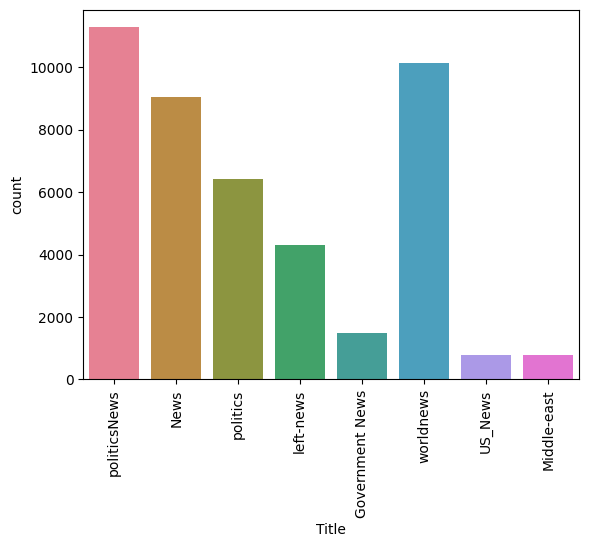

In [57]:
# Set a custom palette with distinct colors for each title category
custom_palette = sns.color_palette("husl", len(df['Title'].unique()))

# Create a countplot with Seaborn and specify the custom palette
sns.countplot(x='Title', data=df, palette=custom_palette)

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

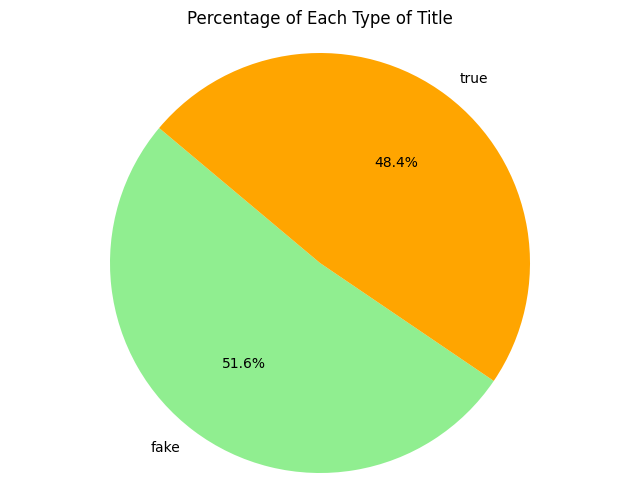

In [58]:
# Calculate the percentage of each type of title
title_percentage = df['Type'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(8, 6))
# Define colors for each type of title
colors = ['lightgreen', 'orange']
plt.pie(title_percentage, labels=title_percentage.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Percentage of Each Type of Title')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [59]:
# Display unique values in the 'type' column
print("\nUnique values in the 'type' column:")
df['Type'].unique()


Unique values in the 'type' column:


array(['true', 'fake'], dtype=object)

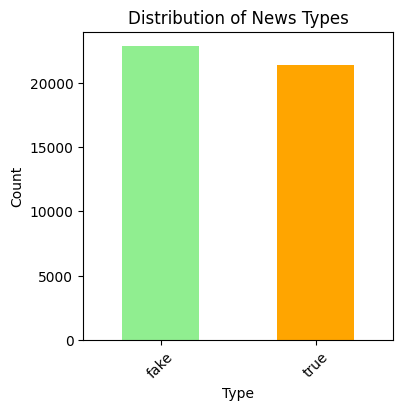

In [60]:
# Explore unique values in the 'Type' column
type_counts = df['Type'].value_counts()

# Define colors for different types
colors = ['lightgreen', 'orange']

# Plot the counts
plt.figure(figsize=(4, 4))
type_counts.plot(kind='bar', color=colors)
plt.title('Distribution of News Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# **Data Preprocessing:**


In [61]:
# Remove unwanted column ('Unnamed: 0','Title', 'Type')
df=df.drop(['Unnamed: 0','Title', 'Type'],axis=1)

In [62]:
df.head()

Content  Type_num
0  new york reuters us environmental group sierra...         1
1  washington reuters us air force asked industry...         1
2  saturday paul ryan posted photo instagram phot...         0
3  america keeps waiting word hillary indicted ob...         0
4                   religion peace ht weasel zippers         0

**processing the text data**


In [64]:
def process_Content(text):
    # Function to remove punctuation marks from text
    def remove_punctuation(text):
        punctuation_pattern = r'[^\w\s]'
        cleaned_text = re.sub(punctuation_pattern, '', text)
        return cleaned_text

    # Function to remove special characters and numbers from text
    def remove_special_characters_and_numbers(text):
        special_characters_and_numbers_pattern = r'[^a-zA-Z\s]'
        cleaned_text = re.sub(special_characters_and_numbers_pattern, '', text)
        return cleaned_text

    # Function to remove digits from text
    def remove_digits(text):
        digit_pattern = r'\d+'
        cleaned_text = re.sub(digit_pattern, '', text)
        return cleaned_text

    # Function to convert text to lowercase
    def convert_to_lowercase(text):
        return text.lower()

    # Function to tokenize the text
    def tokenize_text(text):
        return word_tokenize(text)

    # Function to remove stopwords from tokens
    def remove_stopwords(tokens):
        stop_words = set(stopwords.words('english'))
        return [token for token in tokens if token not in stop_words]

    # Initialize the WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()

    # Function to lemmatize tokens
    def lemmatize_tokens(tokens):
        return [lemmatizer.lemmatize(token) for token in tokens]

    # Function to join tokens back into a single string
    def join_tokens(tokens):
        return ' '.join(tokens)

    cleaned_text = remove_punctuation(text)
    cleaned_text = remove_special_characters_and_numbers(cleaned_text)
    cleaned_text = remove_digits(cleaned_text)  # Remove digits
    cleaned_text = convert_to_lowercase(cleaned_text)
    tokens = tokenize_text(cleaned_text)
    tokens = remove_stopwords(tokens)
    tokens = lemmatize_tokens(tokens)
    processed_Content = join_tokens(tokens)

    return processed_Content

# Apply the process_Content function to the 'Content' column
df['Processed_Content'] = df['Content'].apply(process_Content)

# Display the DataFrame after text preprocessing
df.head()

Content  Type_num  \
0  new york reuters us environmental group sierra...         1   
1  washington reuters us air force asked industry...         1   
2  saturday paul ryan posted photo instagram phot...         0   
3  america keeps waiting word hillary indicted ob...         0   
4                   religion peace ht weasel zippers         0   

                                   Processed_Content  
0  new york reuters u environmental group sierra ...  
1  washington reuters u air force asked industry ...  
2  saturday paul ryan posted photo instagram phot...  
3  america keep waiting word hillary indicted oba...  
4                    religion peace ht weasel zipper

**Get the spacy embeddings for each preprocessed text**

In [65]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [66]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [68]:
#create a new column "vector" that store the vector representation of each pre-processed text

df['vector'] = df['Processed_Content'].apply(lambda text: nlp(text).vector)

df.head()

Content  Type_num  \
0  new york reuters us environmental group sierra...         1   
1  washington reuters us air force asked industry...         1   
2  saturday paul ryan posted photo instagram phot...         0   
3  america keeps waiting word hillary indicted ob...         0   
4                   religion peace ht weasel zippers         0   

                                   Processed_Content  \
0  new york reuters u environmental group sierra ...   
1  washington reuters u air force asked industry ...   
2  saturday paul ryan posted photo instagram phot...   
3  america keep waiting word hillary indicted oba...   
4                    religion peace ht weasel zipper   

                                              vector  
0  [-0.05457698, 0.2326956, -1.116807, 0.06637408...  
1  [-0.13749287, 1.1686223, -1.2088281, 1.0812507...  
2  [-0.66422266, 0.67973304, -1.7513565, 0.321087...  
3  [-0.54207736, 0.07361257, -0.96037245, 0.21260...  
4  [-1.7708981, 1.8078121, -2.807322, 1.563702, 1...

**Train-Test splitting**

In [70]:
from sklearn.model_selection import train_test_split


#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values,
    df.Type_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.Type_num
)

In [71]:
print("Shape of X_train before reshaping: ", X_train.shape)
print("Shape of X_test before reshaping: ", X_test.shape)

Shape of X_train before reshaping:  (35412,)
Shape of X_test before reshaping:  (8854,)


**Reshape the X_train and X_test so as to fit for models**

In [72]:
X_train_2d = np.stack(X_train)
X_test_2d =  np.stack(X_test)

print("Shape of X_train after reshaping: ", X_train_2d.shape)
print("Shape of X_test after reshaping: ", X_test_2d.shape)

Shape of X_train after reshaping:  (35412, 300)
Shape of X_test after reshaping:  (8854, 300)


**Attempt 1:**

* use spacy glove embeddings for text vectorization.

* use Decision Tree as the classifier.

* print the classification report.

In [73]:
from sklearn.tree import DecisionTreeClassifier


#1. creating a Decision Tree model object
clf = DecisionTreeClassifier()

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4570
           1       0.91      0.88      0.89      4284

    accuracy                           0.90      8854
   macro avg       0.90      0.90      0.90      8854
weighted avg       0.90      0.90      0.90      8854



**Attempt 2:**

* use spacy glove embeddings for text vectorization.
* use MultinomialNB as the classifier after applying the MinMaxscaler.
* print the classification report.

In [75]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report


#doing scaling because Negative values will not pass into Naive Bayes models
scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)

#1. creating a MultinomialNB model object
clf = MultinomialNB()

#2. fit with all_train_embeddings and y_train
clf.fit(scaled_train_embed , y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(scaled_test_embed)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      4570
           1       0.84      0.88      0.86      4284

    accuracy                           0.86      8854
   macro avg       0.86      0.86      0.86      8854
weighted avg       0.86      0.86      0.86      8854



**Attempt 3:**

* use spacy glove embeddings for text vectorization.
* use KNeighborsClassifier as the classifier after applying the MinMaxscaler.
* print the classification report.

In [77]:
y_pred = clf.predict(scaled_test_embed)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      1.00      0.68      4570
           1       0.00      0.00      0.00      4284

    accuracy                           0.52      8854
   macro avg       0.26      0.50      0.34      8854
weighted avg       0.27      0.52      0.35      8854



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
from  sklearn.neighbors import KNeighborsClassifier


#1. creating a KNN model object
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      4570
           1       0.91      0.95      0.93      4284

    accuracy                           0.93      8854
   macro avg       0.93      0.93      0.93      8854
weighted avg       0.93      0.93      0.93      8854



**Attempt 4:**

* use spacy glove embeddings for text vectorization.
* use RandomForestClassifier as the classifier after applying the MinMaxscaler.
* print the classification report.

In [79]:
from sklearn.ensemble import RandomForestClassifier


#1. creating a Random Forest model object
clf = RandomForestClassifier()


#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4570
           1       0.95      0.95      0.95      4284

    accuracy                           0.95      8854
   macro avg       0.95      0.95      0.95      8854
weighted avg       0.95      0.95      0.95      8854



**Attempt 5:**

* use spacy glove embeddings for text vectorization.
* use GradientBoostingClassifier as the classifier after applying the MinMaxscaler.
* print the classification report.

In [80]:
from sklearn.ensemble import GradientBoostingClassifier


#1. creating a GradientBoosting model object
clf = GradientBoostingClassifier()

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      4570
           1       0.93      0.94      0.93      4284

    accuracy                           0.94      8854
   macro avg       0.94      0.94      0.94      8854
weighted avg       0.94      0.94      0.94      8854



**Print the confusion Matrix with the best model got**

Text(95.72222222222221, 0.5, 'Truth')

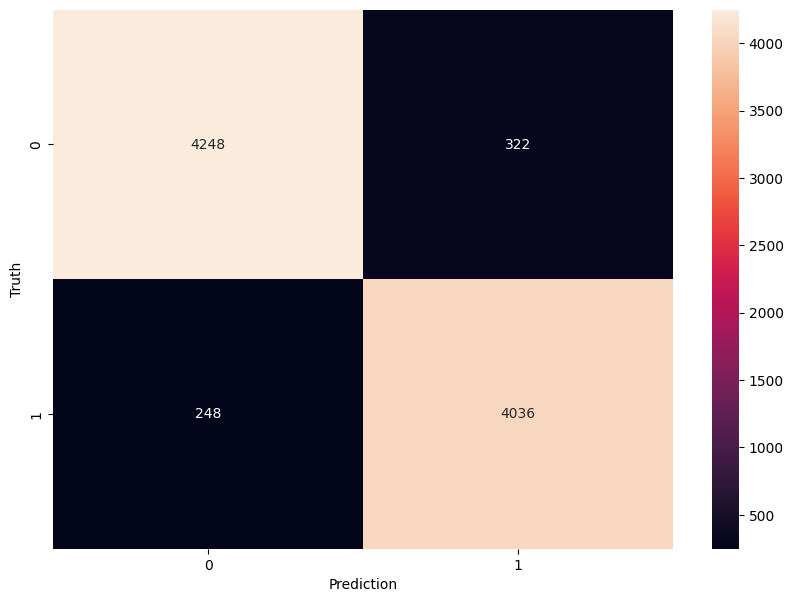

In [81]:
#finally print the confusion matrix for the best model: GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')